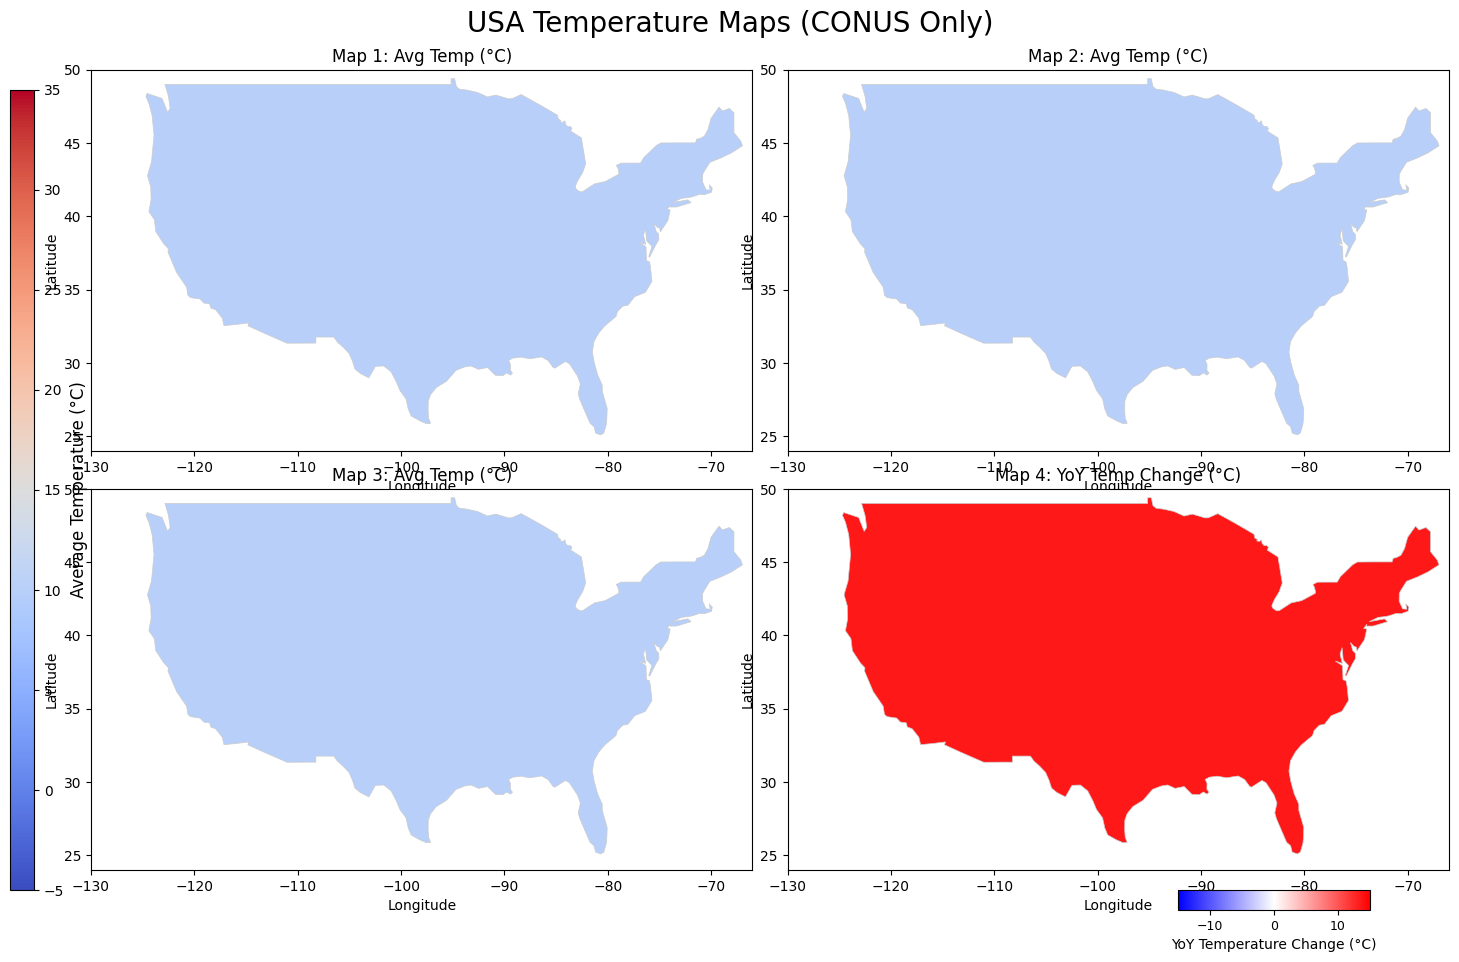

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Wczytaj dane granic stanów USA
states = gpd.read_file('https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA.geo.json')

# Dodaj dane: średnia temperatura i zmiana rok do roku
np.random.seed(42)
states['avg_temp'] = np.random.uniform(-5, 35, size=len(states))          # Średnia temperatura
states['temp_change'] = np.random.uniform(-15, 15, size=len(states))      # Zmiana rok do roku

# Ogranicz do CONUS (continental US) przez bounding box
conus_bounds = [-130, 24, -66, 50]  # [minx, miny, maxx, maxy]
states = states.cx[conus_bounds[0]:conus_bounds[2], conus_bounds[1]:conus_bounds[3]]

# Ustawienia kolorów i norm
cmap_temp = 'coolwarm'
norm_temp = Normalize(vmin=-5, vmax=35)

cmap_change = 'bwr'
norm_change = Normalize(vmin=-15, vmax=15)

# Stwórz subploty
fig, axs = plt.subplots(2, 2, figsize=(16, 10), gridspec_kw={'wspace': 0.05, 'hspace': 0.1})
fig.suptitle('USA Temperature Maps (CONUS Only)', fontsize=20)

# Rysuj mapy
for i, ax in enumerate(axs.flat):
    if i < 3:
        # Pierwsze trzy mapy: średnia temperatura
        states.plot(column='avg_temp', cmap=cmap_temp, linewidth=0.5, ax=ax,
                    edgecolor='0.8', norm=norm_temp)
        ax.set_title(f'Map {i+1}: Avg Temp (°C)', fontsize=12)
    else:
        # Ostatnia mapa: zmiana temperatury
        states.plot(column='temp_change', cmap=cmap_change, linewidth=0.5, ax=ax,
                    edgecolor='0.8', norm=norm_change)
        ax.set_title('Map 4: YoY Temp Change (°C)', fontsize=12)

        # Dodaj małą poziomą legendę (colorbar) tylko dla tej mapy
        cbar_ax_change = fig.add_axes([0.78, 0.08, 0.12, 0.02])  # left, bottom, width, height
        sm_change = cm.ScalarMappable(norm=norm_change, cmap=cmap_change)
        sm_change._A = []
        cbar_change = fig.colorbar(sm_change, cax=cbar_ax_change, orientation='horizontal')
        cbar_change.set_label('YoY Temperature Change (°C)', fontsize=10)
        cbar_change.ax.tick_params(labelsize=9)

    # Widoczny CONUS, osie włączone
    ax.set_xlim(conus_bounds[0], conus_bounds[2])
    ax.set_ylim(conus_bounds[1], conus_bounds[3])
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Duża pionowa legenda dla średniej temperatury
cbar_ax_temp = fig.add_axes([0.05, 0.1, 0.015, 0.8])  # left, bottom, width, height
sm_temp = cm.ScalarMappable(cmap=cmap_temp, norm=norm_temp)
sm_temp._A = []
cbar_temp = fig.colorbar(sm_temp, cax=cbar_ax_temp)
cbar_temp.set_label('Average Temperature (°C)', fontsize=12)
cbar_temp.ax.tick_params(labelsize=10)

# Układ końcowy
plt.subplots_adjust(left=0.1, right=0.95, top=0.92, bottom=0.12)
plt.show()
